<a href="https://colab.research.google.com/github/gino79445/meme-comment-bert-chinese/blob/main/meme_comment_bert_chinese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis Using BERT

- This notebook runs on Google Colab
- Using `ktrain` for modeling
  - The ktrain library is a lightweight wrapper for tf.keras in TensorFlow 2, which is "designed to make deep learning and AI more accessible and easier to apply for beginners and domain experts".
- Easy to implement BERT-like pre-trained language models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/bert

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/bert


## Installing ktrain

In [ ]:
!pip install ktrain


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.4 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 981 kB 61.6 MB/s 
     |████████████████████████████████| 263 kB 70.4 MB/s 
     |████████████████████████████████| 2.8 MB 41.0 MB/s 
     |████████████████████████████████| 1.2 MB 64.1 MB/s 
     |████████████████████████████████| 468 kB 62.3 MB/s 
     |████████████████████████████████| 101 kB 15.5 MB/s 
     |████████████████████████████████| 880 kB 75.7 MB/s 
     |████████████████████████████████| 596 kB 67.8 MB/s 
     |████████████████████████████████| 3.3 MB 54.0 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.3-py3-none-any.whl size=25313110 sha256=89ebfaee99282f6e62395834afce17b048e4a0614e860db0643a1d596aee5c80
  Stored in directory: /root/.cache/pip/wheels/02/b2/23/62848f56f705788e6ad39f23f8c4b8127edbbe9daa14c9c91c
  

## Importing Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf

In [ ]:
tf.__version__

'2.8.2'

## Data Preparation

- Mount the Google Drive first (manually via the tabs on the left of Google Colab

- The default path of the input data csv file is:

```
GOOGLE_DRIVE_ROOT/ColabData/marc_movie_review_metadata.csv
```
- In BERT, there is no need to do word segmentation. The model takes in the raw reviews as the input.

In [ ]:
## loading the train dataset
## change the path if necessary
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bert/comment_data.csv', dtype= str)[['comment','Sentiment']]
# data = data.rename(columns={'reviews':'Reviews', 'rating':'Sentiment'})
data.head()

,comment,Sentiment
0,笑死。🙌。誤會誤會,0
1,靠邀,0
2,有點痛我居然看懂！？剩蛋歌手,0
3,活該靠背喔出人頭地😢媽媽陰影得多大......,0
4,這樣會造成搶劫人數飆升欸🤣,0


In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.1)


In [ ]:
## dimension of the dataset
# data_train = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bert/train.xlsx', dtype= str)[['Reviews','Sentiment']]
# data_test = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bert/test.xlsx', dtype= str)[['Reviews','Sentiment']]
print("Size of train dataset: ",data_train.shape)
print("Size of test dataset: ",data_test.shape)

#printing last rows of train dataset
data_train.head()

#printing head rows of test dataset
data_test.head()

Size of train dataset:  (9255, 2)
Size of test dataset:  (1029, 2)


,comment,Sentiment
3886,陳鈺弘壞,0
2328,真「唐」老鴨在叫,0
5094,LP外露,1
2163,這才是真正要進地獄的人,0
4183,柯彣欣你以為你起跑快就很屌嗎,0


## Train-Test Split

Models supported by transformers library for tensorflow 2:

- **BERT**: bert-base-uncased, bert-large-uncased,bert-base-multilingual-uncased, and others.
- **DistilBERT**: distilbert-base-uncased distilbert-base-multilingual-cased, distilbert-base-german-cased, and others
- **ALBERT**: albert-base-v2, albert-large-v2, and others
- **RoBERTa**: roberta-base, roberta-large, roberta-large-mnli
- **XLM**: xlm-mlm-xnli15–1024, xlm-mlm-100–1280, and others
- **XLNet**: xlnet-base-cased, xlnet-large-cased


In [ ]:
# text.texts_from_df return two tuples
# maxlen means it is considering that much words and rest are getting trucated
# preprocess_mode means tokenizing, embedding and transformation of text corpus(here it is considering BERT model)


(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=data_train,
                                                                   text_column = 'comment',
                                                                   label_columns = 'Sentiment',
                                                                   val_df = data_test,
                                                                   maxlen = 250,
                                                                   lang = 'zh-*',
                                                                   preprocess_mode = 'bert') # or distilbert

['0', '1']
        0    1
3677  1.0  0.0
7819  0.0  1.0
950   1.0  0.0
9080  0.0  1.0
1157  1.0  0.0
['0', '1']
        0    1
3886  1.0  0.0
2328  1.0  0.0
5094  0.0  1.0
2163  1.0  0.0
4183  1.0  0.0
downloading pretrained BERT model (chinese_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: zh-*


Is Multi-Label? False
preprocessing test...
language: zh-*


In [ ]:
## size of data
print(X_train[0].shape, y_train.shape)
print(X_test[0].shape, y_test.shape)

(9255, 250) (9255, 2)
(1029, 250) (1029, 2)


## Define Model

In [ ]:
## use 'distilbert' if you want
model = text.text_classifier(name = 'bert', # or distilbert
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 250
done.


## Define Learner

In [ ]:
#here we have taken batch size as 6 as from the documentation it is recommend to use this with maxlen as 500
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 6)

## Estimate Learning Rate (Optional)

- A nice artilce on how to interpret learning rate plots. See [Keras Learning Rate Finder](https://www.pyimagesearch.com/2019/08/05/keras-learning-rate-finder/).

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
1543/1543 [==============================] - 596s 367ms/step - loss: 0.6265 - accuracy: 0.6689
Epoch 2/2
1543/1543 [==============================] - 254s 164ms/step - loss: 2.8812 - accuracy: 0.5237


done.
Visually inspect loss plot and select learning rate associated with falling loss


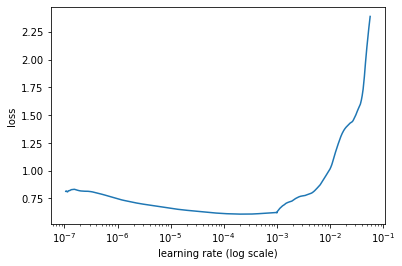

In [ ]:
learner.lr_find(show_plot=True, max_epochs=2)

## Fit and Save Model

In [ ]:
#Essentially fit is a very basic training loop, whereas fit one cycle uses the one cycle policy callback

learner.fit_onecycle(lr = 2e-5, epochs = 1)
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('/content/drive/MyDrive/Colab Notebooks/bert/bert-hell-meme1')




begin training using onecycle policy with max lr of 2e-05...
1543/1543 [==============================] - 618s 389ms/step - loss: 0.4965 - accuracy: 0.7518 - val_loss: 0.4135 - val_accuracy: 0.7862


## Evaluation

In [ ]:
y_pred=predictor.predict(data_test['comment'].values)


In [ ]:
# classification report

from sklearn.metrics import classification_report
y_true = data_test['Sentiment'].values
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.58      0.70       443
           1       0.75      0.95      0.83       586

    accuracy                           0.79      1029
   macro avg       0.82      0.76      0.77      1029
weighted avg       0.81      0.79      0.78      1029



In [ ]:
y_true = data_test['Sentiment'].values
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[359,  80],
       [ 79, 521]])

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8469682386910491

In [ ]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average=None)

array([0.83632, 0.90488])

In [ ]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average=None)

array([0.89787855, 0.84682189])

In [ ]:
# F1
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)


In [ ]:
## AUC-ROC Curve
y_pred_proba = predictor.predict(data_test['Reviews'].values, return_proba=True)
print(predictor.get_classes()) # probability of each class
print(y_pred_proba[:5,])

In [ ]:
# g.save('/content/drive/My Drive/ColabData/ggplot-roc.png', width=12, height=10, dpi=300)

## Prediction and Deployment

In [ ]:
#sample dataset to test on

data = ['笑死' ,'往生了','我的殘疾手冊在哪，喔我還沒申請','出人頭地','猶',"有夠地獄","立刻胡哲","有些事還是不要說比較好⌓‿⌓","超快樂❤️","牛逼"
 ]

In [ ]:
predictor.predict(data)

['1', '1', '1', '0', '1', '0', '0', '1', '1', '1']

In [ ]:
#return_proba = True means it will give the prediction probabilty for each class

predictor.predict(data, return_proba=True)

array([[0.12337696, 0.876623  ],
       [0.18372776, 0.81627226],
       [0.2199243 , 0.7800757 ],
       [0.6379491 , 0.3620509 ],
       [0.364254  , 0.63574606],
       [0.96287763, 0.0371224 ],
       [0.56959116, 0.4304088 ],
       [0.08908884, 0.91091114],
       [0.08467138, 0.9153286 ],
       [0.09928684, 0.90071315]], dtype=float32)

In [ ]:
#classes available

predictor.get_classes()

['0', '1']

In [ ]:
## zip for furture deployment
# !zip -r /content/bert.zip /content/bert

## References

- [`ktrain` module](https://github.com/amaiya/ktrain)
- [Sentiment Classification Using Bert](https://kgptalkie.com/sentiment-classification-using-bert/)
- [當Bert遇上Keras：這可能是Bert最簡單的打開姿勢](http://www.ipshop.xyz/15376.html)
- [進擊的 BERT：NLP 界的巨人之力與遷移學習](https://leemeng.tw/attack_on_bert_transfer_learning_in_nlp.html)
- [Text Classification with Hugging Face Transformers in TensorFlow 2 (Without Tears)](https://towardsdatascience.com/text-classification-with-hugging-face-transformers-in-tensorflow-2-without-tears-ee50e4f3e7ed)
- [Huggingface Transformers](https://github.com/huggingface/transformers)
- [Huggingface Pre-trained Models](https://huggingface.co/transformers/pretrained_models.html)